#Pulsación
La pulsación, o "beats", es un fenómeno acústico que ocurre cuando dos tonos de frecuencias diferentes se reproducen simultáneamente.

Se manifiesta como una oscilación en la amplitud de la onda resultante, que se percibe como un sonido que fluctúa en volumen.

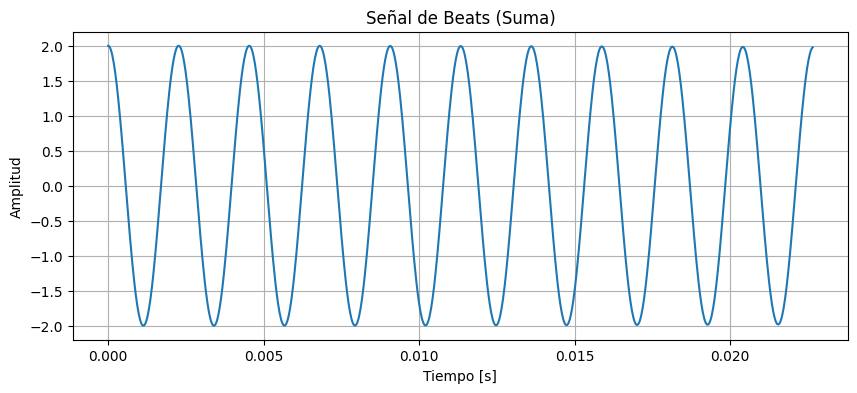

Reproduciendo señal de beats (suma):



La fórmula para calcular la frecuencia de oscilación (frecuencia de batido) es: |f1 - f2|
En este caso, la frecuencia de batido es: |440 Hz - 442 Hz| = 2 Hz

Percepción de las pulsaciones:
- Cuando las frecuencias están muy cerca (440 Hz y 442 Hz), las pulsaciones son lentas (2 Hz) y fáciles de percibir como fluctuaciones de volumen.
- Cuando las frecuencias están más alejadas (440 Hz y 450 Hz), las pulsaciones son más rápidas (10 Hz) y pueden percibirse como un sonido áspero o una disonancia en lugar de fluctuaciones de volumen claras.


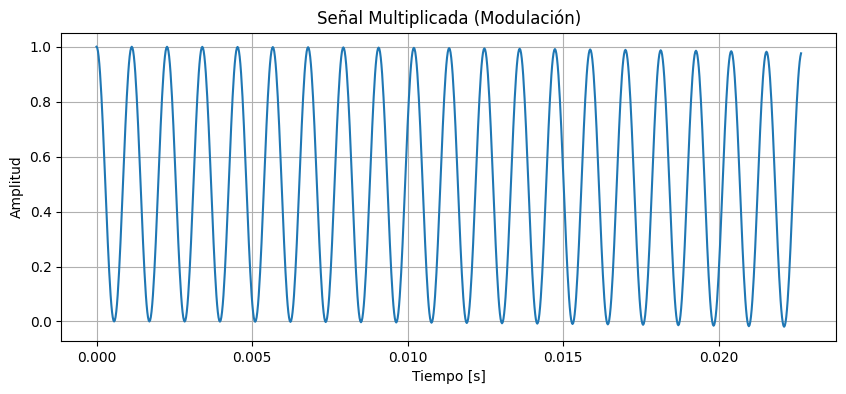


Análisis de la señal multiplicada:
Cuando las dos señales se multiplican, se produce una modulación de amplitud (AM).
La señal resultante tiene componentes de frecuencia en la suma (f1 + f2) y la diferencia (|f1 - f2|) de las frecuencias originales.
En este caso, tendríamos componentes en: 
- Frecuencia de suma: 440 Hz + 442 Hz = 882 Hz
- Frecuencia de diferencia: |440 Hz - 442 Hz| = 2 Hz (esta es la frecuencia de la envolvente)
Si la señal original es cos(2*pi*f1*t) y cos(2*pi*f2*t), la multiplicación es:
cos(2*pi*f1*t) * cos(2*pi*f2*t) = 0.5 * [cos(2*pi*(f1-f2)*t) + cos(2*pi*(f1+f2)*t)]
Esta es una modulación de amplitud con portadora suprimida, ya que las frecuencias originales (f1 y f2) no están presentes en la señal resultante, solo la suma y la diferencia.

Reproduciendo señal multiplicada:


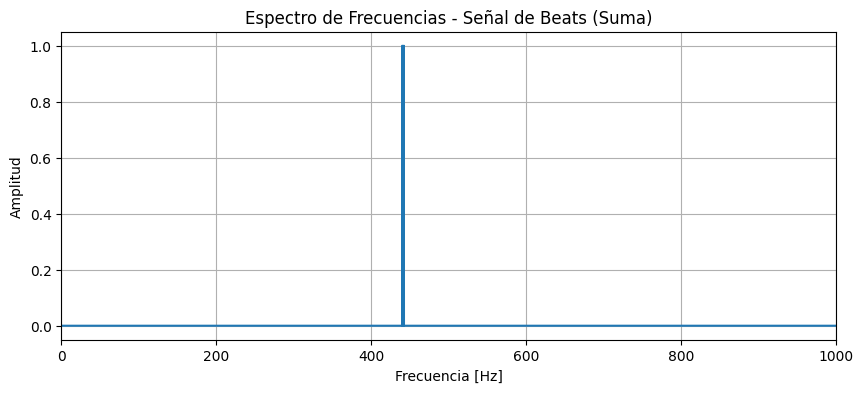

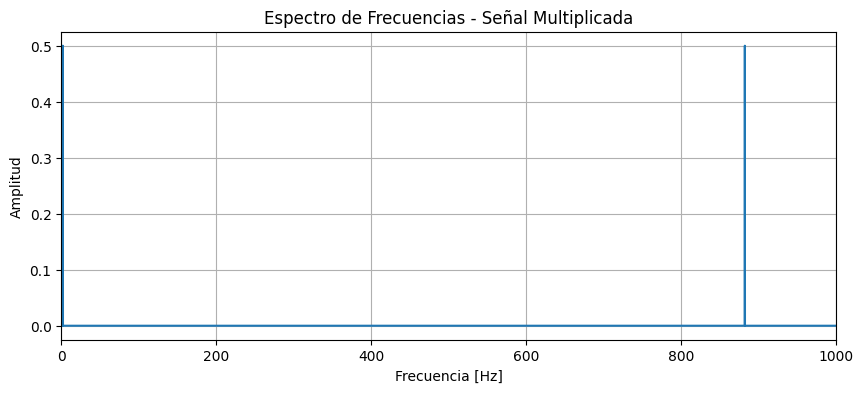

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.fft import fft, fftfreq

def generate_beats(freq1, freq2, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal1 = np.cos(2 * np.pi * freq1 * t)
    signal2 = np.cos(2 * np.pi * freq2 * t)
    beats = signal1 + signal2
    return t, beats, signal1, signal2

# Parámetros
freq1 = 440  # Frecuencia del primer tono en Hz (Nota La)
freq2 = 442  # Frecuencia del segundo tono en Hz
duration = 5.0  # Duración de la señal en segundos
sample_rate = 44100  # Tasa de muestreo

# Generar la señal de beats y señales individuales
t, beats_signal, signal1, signal2 = generate_beats(freq1, freq2, duration, sample_rate)

# Visualizar la señal de beats
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], beats_signal[:1000])  # Visualización de un pequeño fragmento de la señal
plt.title('Señal de Beats (Suma)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Reproducir la señal de beats
print("Reproduciendo señal de beats (suma):")
display(Audio(beats_signal, rate=sample_rate))

# Análisis de pulsación

# 1. Fórmula para calcular la frecuencia de oscilación (frecuencia de batido)
beat_frequency = abs(freq1 - freq2)
print(f"\nLa fórmula para calcular la frecuencia de oscilación (frecuencia de batido) es: |f1 - f2|")
print(f"En este caso, la frecuencia de batido es: |{freq1} Hz - {freq2} Hz| = {beat_frequency} Hz")

# 2. Percepción de las pulsaciones
print("\nPercepción de las pulsaciones:")
print(f"- Cuando las frecuencias están muy cerca ({freq1} Hz y {freq2} Hz), las pulsaciones son lentas ({beat_frequency} Hz) y fáciles de percibir como fluctuaciones de volumen.")

# Demostración con frecuencias más alejadas
freq3 = 440
freq4 = 450
t_far, beats_signal_far, _, _ = generate_beats(freq3, freq4, duration, sample_rate)
beat_frequency_far = abs(freq3 - freq4)
print(f"- Cuando las frecuencias están más alejadas ({freq3} Hz y {freq4} Hz), las pulsaciones son más rápidas ({beat_frequency_far} Hz) y pueden percibirse como un sonido áspero o una disonancia en lugar de fluctuaciones de volumen claras.")

# 3. ¿Qué pasa si se multiplican? (Modulación AM)
multiplied_signal = signal1 * signal2

# Visualizar la señal multiplicada
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], multiplied_signal[:1000])
plt.title('Señal Multiplicada (Modulación)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

print("\nAnálisis de la señal multiplicada:")
print("Cuando las dos señales se multiplican, se produce una modulación de amplitud (AM).")
print("La señal resultante tiene componentes de frecuencia en la suma (f1 + f2) y la diferencia (|f1 - f2|) de las frecuencias originales.")
print("En este caso, tendríamos componentes en: ")
print(f"- Frecuencia de suma: {freq1} Hz + {freq2} Hz = {freq1 + freq2} Hz")
print(f"- Frecuencia de diferencia: |{freq1} Hz - {freq2} Hz| = {abs(freq1 - freq2)} Hz (esta es la frecuencia de la envolvente)")
print("Si la señal original es cos(2*pi*f1*t) y cos(2*pi*f2*t), la multiplicación es:")
print("cos(2*pi*f1*t) * cos(2*pi*f2*t) = 0.5 * [cos(2*pi*(f1-f2)*t) + cos(2*pi*(f1+f2)*t)]")
print("Esta es una modulación de amplitud con portadora suprimida, ya que las frecuencias originales (f1 y f2) no están presentes en la señal resultante, solo la suma y la diferencia.")

# Reproducir la señal multiplicada
print("\nReproduciendo señal multiplicada:")
display(Audio(multiplied_signal, rate=sample_rate))

# Análisis del espectro de frecuencias

# Espectro de la señal de beats (suma)
N_beats = len(beats_signal)
yf_beats = fft(beats_signal)
xf_beats = fftfreq(N_beats, 1 / sample_rate)[:N_beats//2]

plt.figure(figsize=(10, 4))
plt.plot(xf_beats, 2.0/N_beats * np.abs(yf_beats[0:N_beats//2]))
plt.title('Espectro de Frecuencias - Señal de Beats (Suma)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim(0, 1000) # Set x-axis limit
plt.grid(True)
plt.show()

# Espectro de la señal multiplicada
N_multiplied = len(multiplied_signal)
yf_multiplied = fft(multiplied_signal)
xf_multiplied = fftfreq(N_multiplied, 1 / sample_rate)[:N_multiplied//2]

plt.figure(figsize=(10, 4))
plt.plot(xf_multiplied, 2.0/N_multiplied * np.abs(yf_multiplied[0:N_multiplied//2]))
plt.title('Espectro de Frecuencias - Señal Multiplicada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim(0, 1000) # Set x-axis limit
plt.grid(True)
plt.show()